In [1]:
import os
import sys
import catboost
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor, CatBoostClassifier, Pool, EFstrType
from os.path import dirname, realpath, join
from PyQt5.QtWidgets import QApplication, QWidget, QFileDialog, QTableWidget, QTableWidgetItem
from PyQt5.uic import loadUiType
import pandas as pd
import numpy as np
from PyQt5 import QtCore, QtGui, QtWidgets, QtWebEngineWidgets
from PyQt5.QtCore import Qt
import plotly as go2
import kaleido as ka
import plotly.express as px

In [46]:
import tkinter as tk
from tkinter.filedialog import askopenfilename
import pandas as pd

def import_excel_data():
    global v, data
    exc_file_path = askopenfilename(filetypes=[("Excel files", ".xlsx .xls")])
    print(exc_file_path)
    v.set(exc_file_path)
    data = pd.read_excel(exc_file_path)
    

root = tk.Tk()
tk.Label(root, text='File Path').grid(row=0, column=0)
v = tk.StringVar()
entry = tk.Entry(root, textvariable=v).grid(row=0, column=1)
tk.Button(root, text='Browse Data Set',command=import_excel_data).grid(row=1, column=0)
tk.Button(root, text='Close',command=root.destroy).grid(row=1, column=1)
root.mainloop()

D:/python/SLM/Копия БД SLM (образец).xlsx


In [49]:
data.head()

,ID,Марка,Группа материала,Класс,Отрасль применения,Область применения,Форма частиц,Cредний размер частиц. мкм (объемное распределение),Шероховатость поверхности. мкм (после построения),Защитная среда,...,Предел прочности. МПа,Температура плавления. ⁰С,Максимальная температура применения составляет. ⁰С,Разница значение осей\nэквивалентного эллипса гранул W. мкм,Площадь\nповерхности гранулы S пов.\nмкм²,Площадь\nпроекции гранулы S экв.\nмкм²,Минимальная рекомендуемая толщина слоя. мкм,Минимальная толщина стенки. мм,Методы изготовления порошка,Фирмы производители и поставщики
0,1,AlSi10Mg (DE),Металл,Алюминиевый сплав,Аэрокосмическая отрасль. \nавтомобильная промы...,Изготовление тонкостенных деталей с невысокой ...,Сфероидная. характерно наличие мелких сателлит...,39.62,Ra 15 — 19\n Rz 30 — 40,аргон,...,397.0,590.0,500,2.0,49.199,46.612,30.0,0.4,Electrode Induction Guide Inert Gas Atomizatio...,Concept Laser (DE). EOS (DE). \nSLM Solution (...
1,2,316L (US),Металл,Нержавеющая сталь,Авиастроение.\n пищевая промышленность. \nхими...,Изготовление металлических рам для морской и ...,Сфероидная. характерно наличие мелких сателлит...,36.19,Ra 13 — 5 \nRz 80 — 20,азот,...,580.0,1440.0,550,1.0,35.912,34.712,25.0,0.4,Vacuum Induction Melt Inert Gas Atomization (V...,3D Systems (US). Realizer (DE).\n Phenix Syst...
2,3,Ti6Al4V (JP),Металл,Титановый сплав,Технология машиностроения. \nмедицина. \nавтом...,Изготовление биомеханических протезов и детале...,Сфероидная. характерно наличие мелких сателлит...,24.86,Ra 15 — 19\n Rz 96 — 115,аргон,...,570.0,1600.0,400,1.0,48.182,42.231,20.0,0.4,Electrode Induction Guide Inert Gas Atomizatio...,Concept Laser (DE). SLM Solutions (DE). \nRay...
3,4,Inconel 718 (US),Металл,Никельхромовый сплав,Ракетнокосмическая промышленность. авиастроение\n,Изготовление турбин и \nракетных двигателей,Сфероидная. характерно наличие мелких сателлит...,44.56,Ra 10 — 15\n Rz 50 — 90,азот,...,1200.0,1260.0,704,1.0,48.673,43.198,20.0,0.3,Vacuum Induction Melt Inert Gas Atomization (V...,Special Metals Corporation (US). \nSLM Solut...
4,5,PA12 (DE),Полимер,Полиамид,Электротехническая. радиотехническая. автомоб...,Трубки. фитинги. шланги. штуцеры. крышки,Сфероидная. характерно наличие мелких сателлит...,38.51,Ra 10 — 11\n Rz 30 — 50,нет,...,100.0,178.0,120,1.0,38.911,35.129,30.0,0.8,Vacuum Induction Melt Inert Gas Atomization (V...,Hangzhou Guozhen Wanxin Coating \nEquipments M...


In [60]:
def infoOut(data,details=False):
    dfInfo = data.columns.to_frame(name='Column')
    dfInfo['Non-Null Count'] = data.notna().sum()
    dfInfo['Dtype'] = data.dtypes
    dfInfo.reset_index(drop=True,inplace=True)
    if details:
        rangeIndex = (dfInfo['Non-Null Count'].min(),dfInfo['Non-Null Count'].min())
        totalColumns = dfInfo['Column'].count()
        dtypesCount = dfInfo['Dtype'].value_counts()
        totalMemory = dfInfo.memory_usage().sum()
        return dfInfo, rangeIndex, totalColumns, dtypesCount, totalMemory
    else:
        return dfInfo

In [88]:
#выводим таблицу с подсвеченным количеством и процентом пропусков для каждого стобца
def infoT(data):
    infotable = infoOut(data)
    perc = np.round(infoTable['Non-Null Count']/max(infoTable['Non-Null Count'])*100, 2)
    infotable['Non-Null_percent'] = perc
    infotable.style.background_gradient(subset = 'Non-Null_percent')
    return infotable

In [63]:
infoTable = infoOut(data)

In [70]:
perc = np.round(infoTable['Non-Null Count']/max(infoTable['Non-Null Count'])*100, 2)

In [75]:
infoTable['Non-Null_percent'] = perc

In [91]:
infoTable.style.background_gradient(subset = 'Non-Null_percent')

,Column,Non-Null Count,Dtype,Non-Null_percent
0,ID,364,int64,100.000000
1,Марка,364,object,100.000000
2,Группа материала,364,object,100.000000
3,Класс,364,object,100.000000
4,Отрасль применения,94,object,25.820000
5,Область применения,99,object,27.200000
6,Форма частиц,63,object,17.310000
7,Cредний размер частиц. мкм (объемное распределение),77,object,21.150000
8,Шероховатость поверхности. мкм (после построения),63,object,17.310000
9,Защитная среда,74,object,20.330000


In [52]:
#гистограмма распределений по классам
def class_hist(data):
    return data['Класс'].value_counts().plot(kind='barh')

<AxesSubplot:>

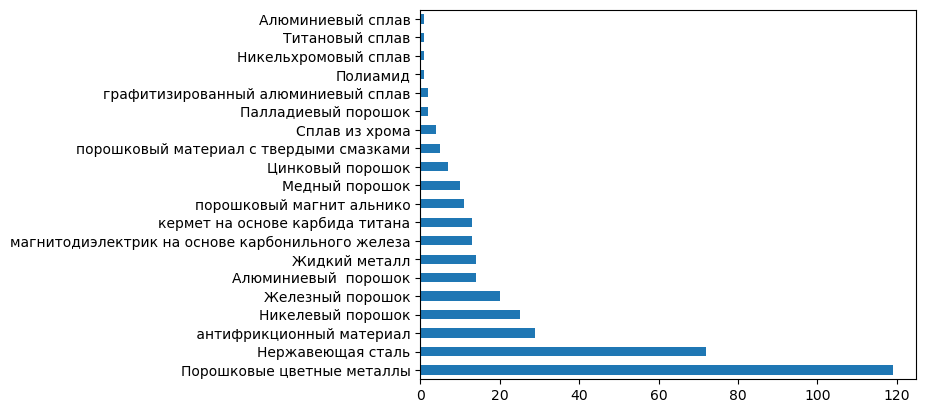

In [53]:
class_hist(data)

In [56]:
#строим матрицу корреляций
import seaborn as sns

def corr(data):
    return sns.heatmap(data.corr(), 
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True)

<AxesSubplot:>

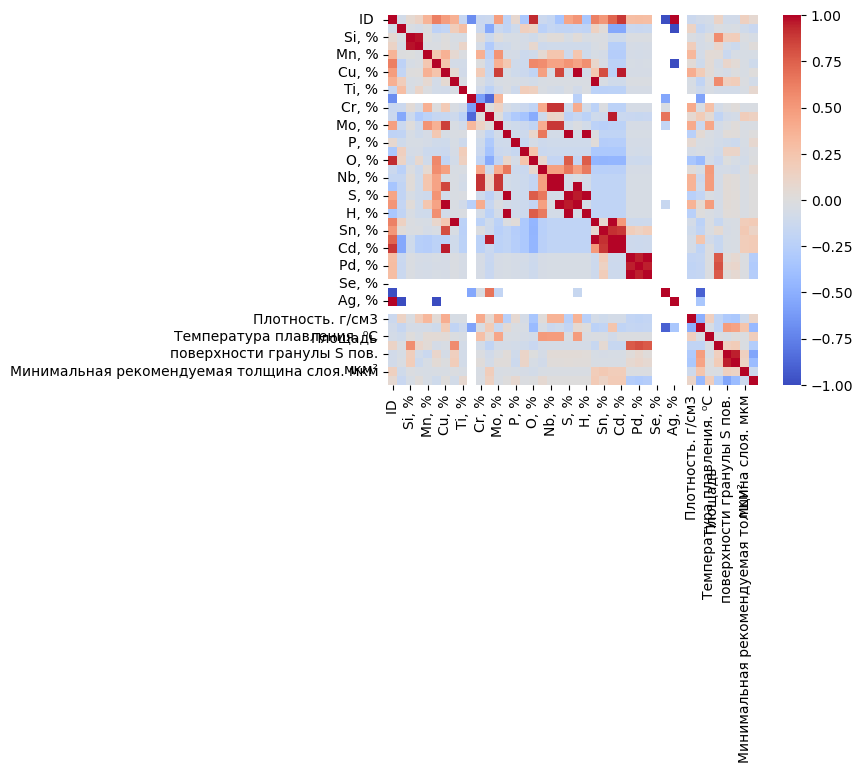

In [57]:
corr(data)

In [100]:
#гистограмма распределения предела прочности
def stress_hist(data):
    sns_plot = sns.distplot(data['Предел прочности. МПа'])
    return sns_plot.get_figure()


C:\Users\ivan\AppData\Local\Temp\ipykernel_4924\2857356658.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(data['Предел прочности. МПа'])


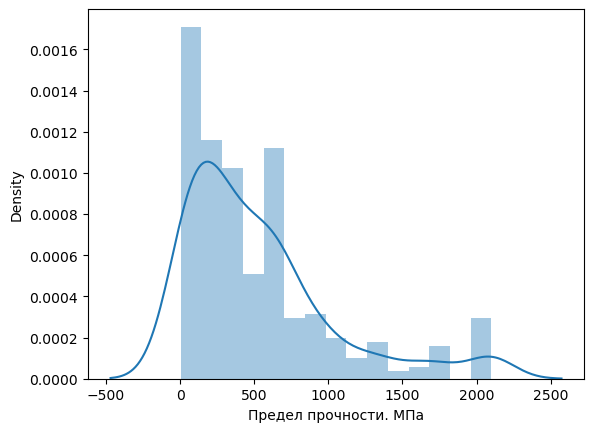

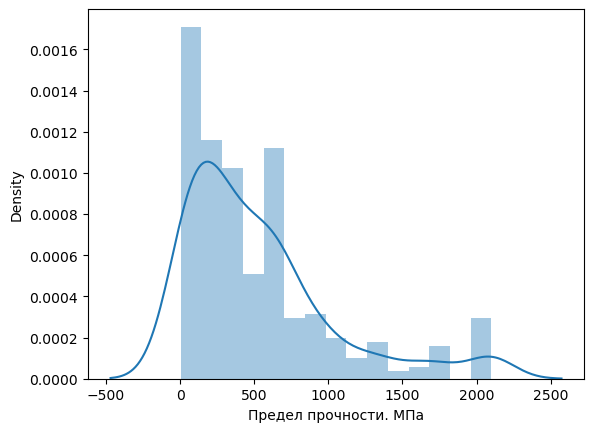

In [102]:
stress_hist(data)